# Projeto Pima Indians Diabetes Database

> O notebook está formatado com o uso da metodologia CRISP-DM.

O objetivo desse notebook é, dado as informações de um paciente, determinar a probabilidade do paciente desenvolver diabetes.

### Descrição dos dados

- **Class**: variável de classe, ou variável alvo (0: a pessoa não é diabética / 1: a pessoa é diabética).

- **Pregnancies**: número de gravidezes.

- **Glucose**: concentração de glicose plasmática durante 2 horas em um teste oral de tolerância à glicose.

BloodPressure: pressão sanguínea diastólica (mm Hg).

- **SkinThickness**: espessura da dobra cutânea do tríceps (mm).

- **Insulin**: nível de insulina no sangue (mu U/ml).

- **BMI**: IMC, Índice de Massa Corporal (peso em kg/(altura em m)2).

- **Pedigree**: função hereditária – uma função que classifica a probabilidade de diabetes baseada no histórico familiar exclusivamente.

- **Age**: idade em anos.


### Step 0.1: Importing libs and helpter functions

In [66]:
# Importing libs

import pandas as pd

pd.set_option('display.float_format', lambda x: '%.2f' % x)

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
config = {
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.edgecolor': '.4',
    'axes.labelcolor': '.0',
    'axes.titlesize': 'large',
    'axes.labelsize': 'medium',
    'figure.autolayout': True,
    'figure.figsize': (4.5, 3.5),
    'font.family': ['serif'],
    'font.size': 10.0,
    'grid.linestyle': '--',
    'legend.facecolor': '.9',
    'legend.frameon': True,
    'savefig.transparent': True,
    'text.color': '.0',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
}

sns.set(style="whitegrid")
sns.set_context("paper")
sns.set_style("ticks", config)

# Divisão da base de dados
from sklearn.model_selection import train_test_split
 
# API para modelo de Regressão Logística
import statsmodels.api as sm
 
# Avaliação da performance do modelo
from sklearn import metrics
from sklearn.metrics import (accuracy_score, 
                             confusion_matrix, 
                             recall_score, 
                             precision_score)

### Step 0.2: Loading data

In [67]:
data_raw = pd.read_csv('data\diabetes.csv')

## Step 1 - Entendendo os dados

In [68]:
df = data_raw.copy()
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1


In [69]:
df.tail(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
765,5,121,72,23,112,26.20,0.24,30,0
766,1,126,60,0,0,30.10,0.35,47,1
767,1,93,70,31,0,30.40,0.32,23,0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [71]:
# Quantidade de elementos únicos
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [72]:
# Verificar o formato dos dados
print(f'Shape dos dados: {df.shape}')
print(f'Esta base de dados tem {df.shape[0]} linhas e {df.shape[1]} colunas.')

Shape dos dados: (768, 9)
Esta base de dados tem 768 linhas e 9 colunas.


### Verificar valores nulos

In [73]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Estatística descritiva

Como não há dados categóricos, não vamos dividi-los em numerical attributes e categorical attributes.

In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.00,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.00,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.00,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.00,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.00,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.00,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.00,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.00,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00


## Análise estatística

### Análise de dados Univariada

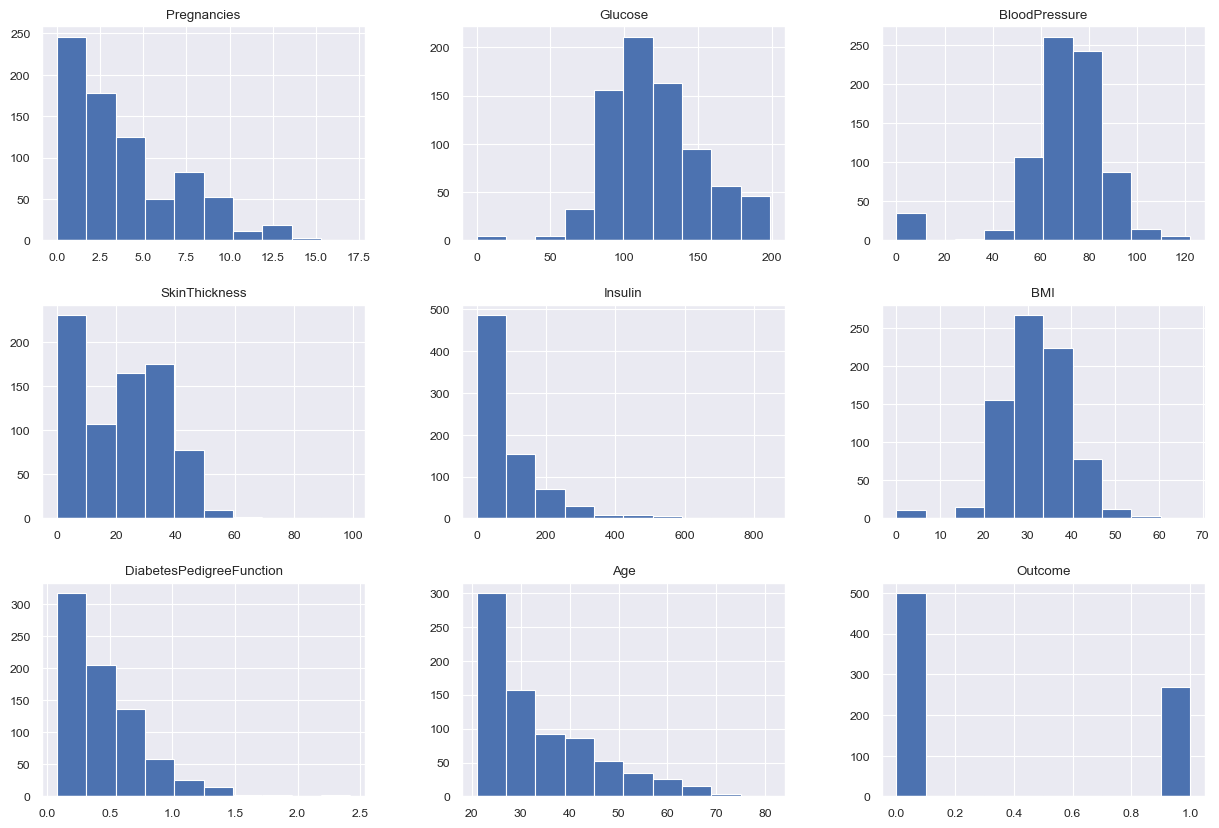

In [75]:
# Plota Histogramas para toda a base de dados
sns.set_style('darkgrid')
df.hist(figsize=(15, 10))
plt.show()

Vamos observar que há dados com valores impossíveis, como Glucose, BloodPressure, SkinThickness, Insulin, BMI e DiabetesPedrigreeFunction. Para não descartar os dados, vamos substituí-los pela média dos valores. 

In [76]:
# Colunas para converter 0 em NaN
cols = ['Glucose', 'BloodPressure', 'SkinThickness',
        'Insulin', 'BMI', 'DiabetesPedigreeFunction']

# Substitui 0 em NaN
df[cols] = df[cols].replace(0, np.nan)

In [77]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Na célula anterior, vemos que há linhas demais que foram identificadas em situação absurda. Para isso, vamos substituir os valores faltantes pela média da coluna.

In [78]:
# Imputando os valores nulos com a média
df[cols] = df[cols].fillna(df[cols].mean())

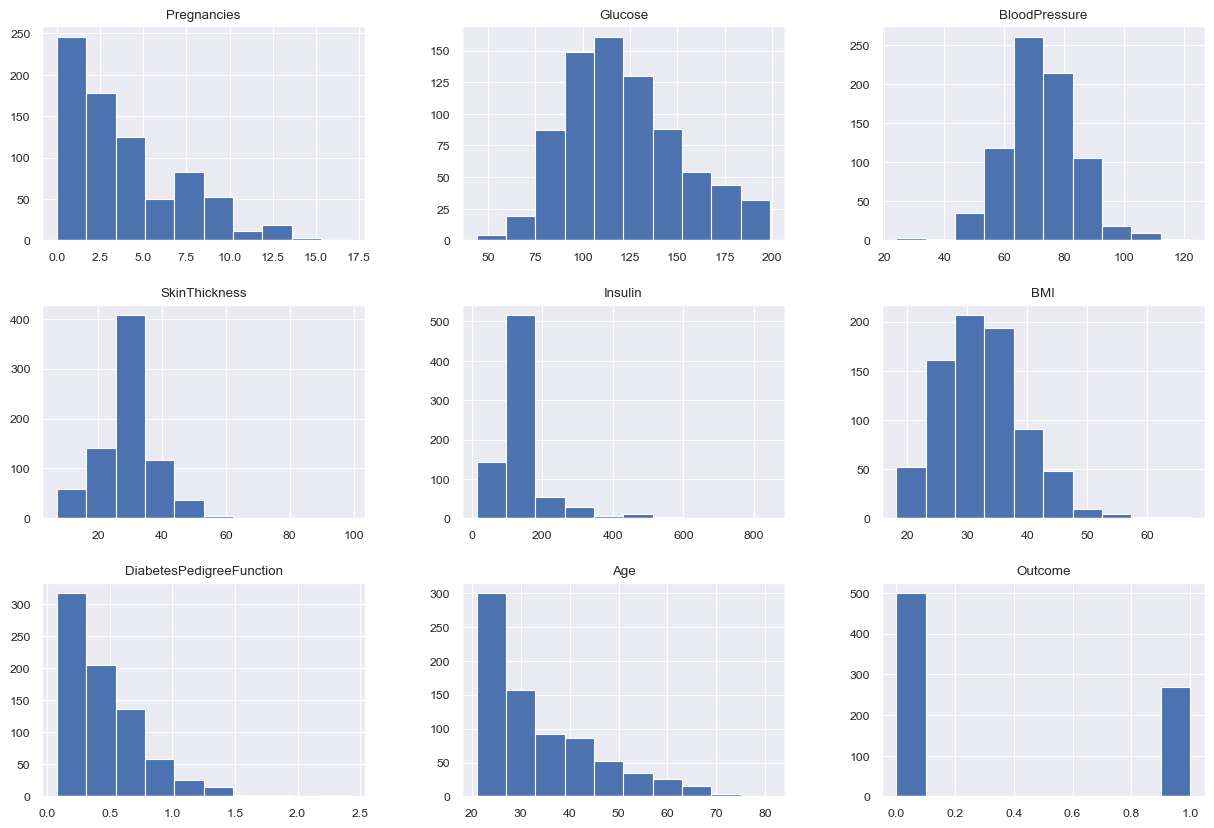

In [79]:
# Plota Histogramas para toda a base de dados
sns.set_style('darkgrid')
df.hist(figsize=(15, 10))
plt.show()

## Análise de dados bivariada

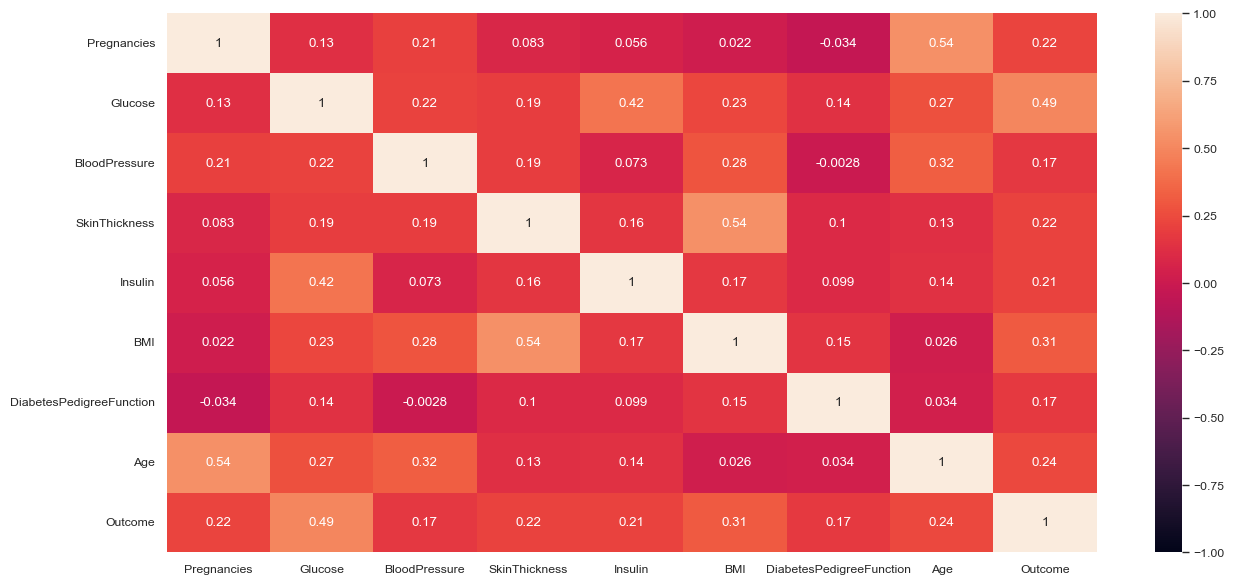

In [80]:
# Mapa de Calor para Correlação
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

In [81]:
# Contagem dos valores em cada classe
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [82]:
# Porcentagem dos valores em cada classe
df['Outcome'].value_counts(normalize=True)

Outcome
0   0.65
1   0.35
Name: proportion, dtype: float64

In [83]:
# Variáveis independentes (características)
X = df.drop(['Outcome'], axis=1) # features of interest

# Variável dependente (alvo)
y = df['Outcome'] # feature target

# Adiciona a constante
# X = sm.add_constant(X)

In [84]:
# Divisão dos dados em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=1,
                                                    stratify=y)  # mantém as proporções das classes

y_train.value_counts(normalize=True)


Outcome
0   0.65
1   0.35
Name: proportion, dtype: float64

In [87]:
# Instancia e treina o modelo
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.568524
         Iterations 6


In [89]:
# Imprime o resumo da Regressão Logística
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  537
Model:                          Logit   Df Residuals:                      529
Method:                           MLE   Df Model:                            7
Date:                Sat, 27 May 2023   Pseudo R-squ.:                  0.1204
Time:                        09:43:05   Log-Likelihood:                -305.30
converged:                       True   LL-Null:                       -347.09
Covariance Type:            nonrobust   LLR p-value:                 2.560e-15
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1449      0.035      4.115      0.000       0.076       0.214
Glucose                      0.0218      0.004      5.697      0.000       0.014       0.

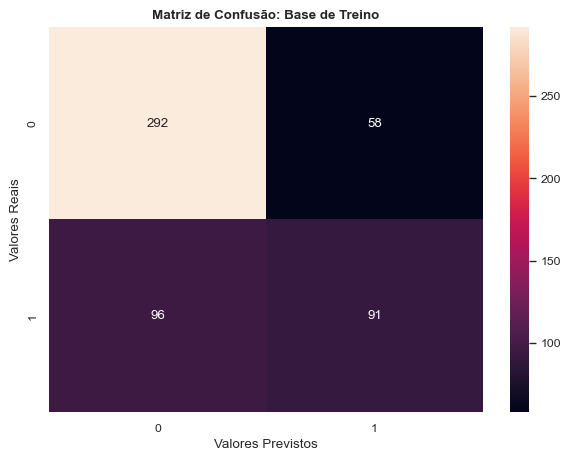

In [90]:
# Realiza as predições na base de treino
# O limiar de classificação padrão é 0.5
pred_train = lg.predict(X_train) > 0.5
pred_train = np.round(pred_train)

# Gera a Matriz de Confusão
cm = confusion_matrix(y_train, pred_train)

# Plot da Matriz de Confusão
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Matriz de Confusão: Base de Treino', weight='bold')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.show()

In [91]:
# Acurácia
acc = accuracy_score(y_train, pred_train)
# Precisão
prec = precision_score(y_train, pred_train)
# Recall
rec = recall_score(y_train, pred_train)
 
print(f'Acurácia na base de treino: {round(acc, 2) * 100}%')
print(f'Precisão na base de treino: {round(prec, 2) * 100}%')
print(f'Recall na base de treino: {round(rec, 2) * 100}%')

Acurácia na base de treino: 71.0%
Precisão na base de treino: 61.0%
Recall na base de treino: 49.0%
